In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tt
import bpx
import copy
import matplotlib
%matplotlib inline
%load_ext line_profiler

markers = ['>', 'o', 's', 'v', 'p', '*', 'D']

In [2]:
sols_x = {}
sols_y = {}
Ls = {}
epss_ms = []
    
    
with np.load('data/a1_ms2d_unknownsol_als_dd.npz') as data:
    eps_ms = data['dsols_x'][()].keys()[0]
    sols_x[eps_ms] = data['dsols_x'][()][eps_ms]
    sols_y[eps_ms] = data['dsols_y'][()][eps_ms]
    Ls[eps_ms] = data['Ls'][()][eps_ms][:len(sols_x[eps_ms])]
    epss_ms.append(data['dsols_x'][()].keys()[0])
    
with np.load('data/a2_ms2d_unknownsol_als_dd.npz') as data:
    eps_ms = data['dsols_x'][()].keys()[0]
    sols_x[eps_ms] = data['dsols_x'][()][eps_ms]
    sols_y[eps_ms] = data['dsols_y'][()][eps_ms]
    Ls[eps_ms] = data['Ls'][()][eps_ms][:len(sols_x[eps_ms])]
    epss_ms.append(data['dsols_x'][()].keys()[0])

with np.load('data/a3_ms2d_unknownsol_als_dd.npz') as data:
    eps_ms = data['dsols_x'][()].keys()[0]
    sols_x[eps_ms] = data['dsols_x'][()][eps_ms][:-1]
    sols_y[eps_ms] = data['dsols_y'][()][eps_ms][:-1]
    Ls[eps_ms] = data['Ls'][()][eps_ms][:len(sols_x[eps_ms])]
    epss_ms.append(data['dsols_x'][()].keys()[0])
    
sols_exact_L = {}
for eps_ms in epss_ms:
    for i in range(len(sols_x[eps_ms])):
        sols_x[eps_ms][i] = tt.vector.from_list(sols_x[eps_ms][i])
        sols_y[eps_ms][i] = tt.vector.from_list(sols_y[eps_ms][i])
    L = Ls[eps_ms][i]
    sol_ext_x = tt.vector.to_list(sols_x[eps_ms][-2])
    sol_ext_x = tt.vector.from_list([np.ones((1, 1, 1))] + sol_ext_x)
    sol_ext_y = tt.vector.to_list(sols_y[eps_ms][-2])
    sol_ext_y = tt.vector.from_list([np.ones((1, 1, 1))] + sol_ext_y)                                           

In [3]:
sols_exact_x = {}
sols_exact_y = {}
errs_h1_exact = {}
for eps_ms in epss_ms:
    print 'eps', eps_ms
    P = tt.kron(tt.matrix(np.ones((2, 1))), tt.eye(2, d=Ls[eps_ms][-1]))
    P = bpx.zkronm(P, P)
    sols_exact_x[eps_ms] = []
    sols_exact_y[eps_ms] = []
    errs_h1_exact[eps_ms] = []
    sol_ext_x = tt.vector.to_list(sols_x[eps_ms][-2])
    sol_ext_y = tt.vector.to_list(sols_y[eps_ms][-2])
    sol_ext_x = tt.vector.from_list([np.ones((1, 1, 1))] + sol_ext_x)
    sol_ext_y = tt.vector.from_list([np.ones((1, 1, 1))] + sol_ext_y)
    sol_extr_x = (2*sols_x[eps_ms][-1] - tt.matvec(P, sol_ext_x).round(1e-14)).round(1e-12)
    sol_extr_y = (2*sols_y[eps_ms][-1] - tt.matvec(P, sol_ext_y).round(1e-14)).round(1e-12)
    for i in range(len(sols_x[eps_ms]))[::-1]:
        print i
        L = Ls[eps_ms][i]
        #print (sol_extr - sols[eps_ms][i]).norm() / (sols[eps_ms][i]).norm()
        sols_exact_x[eps_ms].append(sol_extr_x)
        sols_exact_y[eps_ms].append(sol_extr_y)
        nrm = (sol_extr_x - sols_x[eps_ms][i]).norm()**2
        nrm += (sol_extr_y - sols_y[eps_ms][i]).norm()**2
        nrm /= sol_extr_x.norm()**2 + sol_extr_y.norm()**2
        nrm = np.sqrt(nrm)
        errs_h1_exact[eps_ms].append(nrm)
        P = 0.5 * tt.kron(tt.matrix(np.ones((1, 2))), tt.eye(2, d=L))
        P = bpx.zkronm(P, P)
        sol_extr_x = tt.matvec(P, sol_extr_x).round(1e-12)
        sol_extr_x = tt.sum(sol_extr_x, axis=0)
        sol_extr_y = tt.matvec(P, sol_extr_y).round(1e-12)
        sol_extr_y = tt.sum(sol_extr_y, axis=0)
    sols_exact_x[eps_ms] = sols_exact_x[eps_ms][::-1]
    sols_exact_y[eps_ms] = sols_exact_y[eps_ms][::-1]
    errs_h1_exact[eps_ms] = errs_h1_exact[eps_ms][::-1]

eps 0.001953125
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
eps 1.52587890625e-05
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
eps 1.1920928955078125e-07
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0


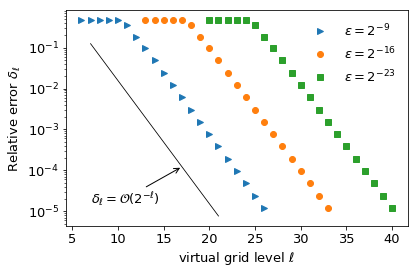

In [9]:
matplotlib.rcParams.update({'font.size': 13})

x = np.arange(7, 22)
y = 2.0 ** (-x + 4)
plt.semilogy(x, y, 'k', linewidth=0.8)

ind_last = -2
for i, eps_ms in enumerate(np.sort(epss_ms)[::-1]):
    label = '$\\varepsilon = 2^{-' + str(int(np.abs(np.log2(eps_ms)))) + '}$'
    if i == 2:
        ind_last = -1
    plt.semilogy(Ls[eps_ms][:ind_last], errs_h1_exact[eps_ms][:ind_last], '.', 
                 label=label, marker=markers[i]) 
    
ind = 10
plt.annotate('$\\delta_\\ell=\mathcal{O}(2^{-\\ell})$', xy=(x[ind], y[ind]), 
             xytext=(x[ind]-10, 2.0**(np.log2(y[ind])-3)),
             arrowprops=dict(facecolor='black',arrowstyle='->', connectionstyle="arc3"))

plt.xlabel('virtual grid level $\\ell$')
#plt.ylabel('$|\cdot|_{H^1(\\Omega)}$ relative error $\\delta_\\ell$')
plt.ylabel('Relative error $\\delta_\\ell$')
plt.legend(frameon=False)
plt.tight_layout()

#plt.savefig('figs/multiscale/2d_err.pdf')

In [8]:
epss = 10 ** (-np.linspace(0, 10, 101))
const_eps = 2
eranks = {}
errs_h1 = {}
for eps_ms in epss_ms:
    eranks[eps_ms] = []
    errs_h1[eps_ms] = []
    for i in range(len(Ls[eps_ms])):
        sol_eps = copy.deepcopy(sols_x[eps_ms][i])
        sol_exact = copy.deepcopy(sols_exact_x[eps_ms][i])
        err_h1 = (sol_eps - sol_exact).norm() / (sol_exact).norm()
        for eps in list(epss)[::-1]:
            sol_eps = sol_eps.round(eps)
            err_h1_eps = (sol_exact - sol_eps).norm() / sol_exact.norm()
            if  err_h1_eps > const_eps * err_h1:
                eranks[eps_ms].append(sol_eps.erank)
                errs_h1[eps_ms].append(err_h1_eps)
                break

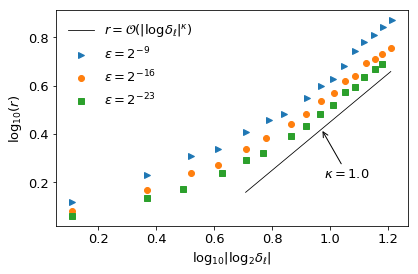

In [15]:
matplotlib.rcParams.update({'font.size': 13})

fig = plt.figure()
ax = fig.add_subplot(111)

k = 1.0

x1 = np.log10(-np.log2(errs_h1[2**(-16)]))[4:-1]
y1 = (k*x1 - 0.55)
plt.plot(x1, y1, 'k-', linewidth=0.8, label='$r=\\mathcal{O}(|\log \\delta_\\ell|^{\\kappa})$')

ind = 4
ax.annotate('$\\kappa={}$'.format(k), xy=(x1[ind], y1[ind]), xytext=(x1[ind]+0.01, y1[ind]-0.2),
            arrowprops=dict(facecolor='black',arrowstyle='->', connectionstyle="arc3"))

for i, eps_ms in enumerate(np.sort(epss_ms)[::-1]):
    label = '$\\varepsilon = 2^{-' + str(int(np.abs(np.log2(eps_ms)))) + '}$'
    plt.plot(np.log10(-np.log2(errs_h1[eps_ms][:-1])), np.log10(eranks[eps_ms][:-1]), '.', label=label, marker=markers[i]) 
plt.legend()


#plt.plot(x, (1*x +0.9), 'k-', linewidth=0.8)


plt.xlabel('$\log_{10}|\log_2 \\delta_\\ell|$')
plt.ylabel('$\log_{10}(r)$')
plt.legend(frameon=False, labelspacing=0.5)#loc='upper center', bbox_to_anchor=(0.5, 0.0))
plt.tight_layout()

#plt.savefig('figs/2d_rank.pdf')

In [ ]:
matplotlib.rcParams.update({'font.size': 13})

fig = plt.figure()
ax = fig.add_subplot(111)

kmin = 0.9

x1 = np.log10(-np.log2(errs_h1[2**(-16)]))[4:-3]
y1 = (kmin*x1 - 0.55)
plt.plot(x1, y1, 'k-', linewidth=0.8, label='$r=\\mathcal{O}(|\log \\delta_\\ell|^{\\kappa})$')

ind = 4
ax.annotate('$\\kappa={}$'.format(kmin), xy=(x1[ind], y1[ind]), xytext=(x1[ind]+0.01, y1[ind]-0.2),
            arrowprops=dict(facecolor='black',arrowstyle='->', connectionstyle="arc3"))

kmax = 0.

x1 = np.log10(-np.log2(errs_h1[2**(-16)]))[2:-7]
y1 = (kmax*x1 - 0.2)
plt.plot(x1, y1, 'k-', linewidth=0.8)

ind = 4
ax.annotate('$\\kappa={}$'.format(kmax), xy=(x1[ind], y1[ind]), xytext=(x1[ind]-0.3, y1[ind]+0.1),
            arrowprops=dict(facecolor='black',arrowstyle='->', connectionstyle="arc3"))

for i, eps_ms in enumerate(np.sort(epss_ms)[::-1]):
    label = '$\\varepsilon = 2^{-' + str(int(np.abs(np.log2(eps_ms)))) + '}$'
    plt.plot(np.log10(-np.log2(errs_h1[eps_ms][:-3])), np.log10(eranks[eps_ms][:-3]), '.', label=label, marker=markers[i]) 
plt.legend()


#plt.plot(x, (1*x +0.9), 'k-', linewidth=0.8)


plt.xlabel('$\log_{10}|\log_2 \\delta_\\ell|$')
plt.ylabel('$\log_{10}(r)$')
plt.legend(frameon=False, labelspacing=0.5)#loc='upper center', bbox_to_anchor=(0.5, 0.0))
plt.tight_layout()

#plt.savefig('figs/2d_rank.pdf')